# YOLOv5 Object Detection #

## Introduction ##
Object detection is a fundamental task in computer vision, enabling systems to automatically identify and locate objects within images and videos. In this project, we leverage the YOLOv5 Nano model to build a streamlined and user-friendly object detection system. The workflow includes detection and tracking of unique objects in images, videos, and webcam photos, with results visualized and summarized both visually and textually.

The project combines the power of the Ultralytics YOLO library, OpenCV, and Streamlit to create an interactive and efficient solution. The entire process is documented and demonstrated in this Jupyter Notebook, making it easy to understand, reproduce, and extend for various applications.

### Step 1: Install Required Libraries ###
In this cell, we install all the necessary Python packages for our object detection project.
ultralytics for YOLOv5 model and tracking
opencv-python-headless for image and video processing
tqdm for progress bars
matplotlib for visualization in the notebook

In [ ]:
# 1. Install Required Libraries
!pip install ultralytics opencv-python-headless tqdm matplotlib

### Step 2: Import Dependencies ###
Here, we import all the Python modules required for model loading, image and video processing, progress tracking, data handling, and visualization.
This ensures our notebook is ready for the detection workflow.

In [2]:
# 2. Import Dependencies
from ultralytics import YOLO
import cv2
import time
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt

### Step 3: Initialize the YOLOv5 Nano Model ###
We load the YOLOv5 Nano model, which is a lightweight and fast object detection model.
This model will be used for all image, video, and webcam detection tasks in this notebook.

In [3]:
# 3. Initialize YOLOv5 Nano Model 
model = YOLO('yolov5nu.pt')

100%|██████████████████████████████████████████████████████████████████████████████| 5.31M/5.31M [00:08<00:00, 673kB/s]


### Step 4: Load and Preprocess an Image ###
In this step, we read an image from disk and resize it to a standard size (640x480 pixels).
Preprocessing ensures the image matches the input requirements of the YOLOv5 model.

In [4]:
# 4. Load and Preprocess an Image
img_path = 'image1.jpg'
image = cv2.imread(img_path)
image = cv2.resize(image, (640, 480))

### Step 5: Run Object Detection on the Image ###
We use the YOLOv5 model to detect objects in the preprocessed image.
The model outputs bounding boxes, class labels, and confidence scores for each detected object.

In [5]:
# 5. Run Object Detection on Image
results = model(image, imgsz=320)


0: 256x320 1 chair, 1 couch, 2 vases, 629.4ms
Speed: 187.0ms preprocess, 629.4ms inference, 73.3ms postprocess per image at shape (1, 3, 256, 320)


### Step 6: Visualize Detection Results ###
This cell displays the image with detected objects, showing bounding boxes and labels using Matplotlib.
Visualization helps us quickly verify the model’s predictions.

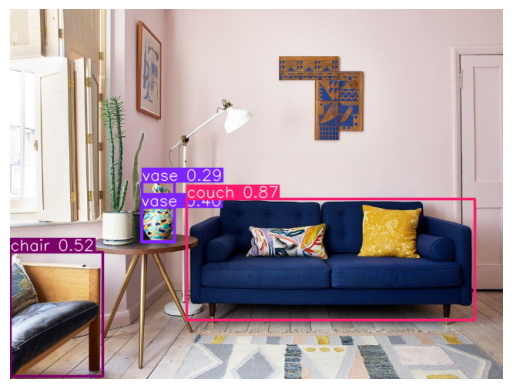

In [6]:
# 6. Visualize Detection Results on Image
plt.imshow(results[0].plot()[:, :, ::-1])
plt.axis('off')
plt.show()

### Step 7: Extract Detected Classes from the Image ###
Here, we extract the class names and count how many times each class appears in the detection results.
This gives us a summary of the objects found in the image.

In [7]:
# 7. Extract Detected Classes from Image
class_counts = defaultdict(int)
for detection in results[0].boxes.data.cpu().numpy():
    class_id = int(detection[5])
    class_name = results[0].names[class_id]
    class_counts[class_name] += 1
print("Detected objects in image:", dict(class_counts))

Detected objects in image: {'couch': 1, 'chair': 1, 'vase': 2}


### Step 8: Generate a Descriptive Sentence for the Image ###
This cell creates a human-readable summary sentence based on the detected objects and their counts in the image.
This is useful for reporting or automated captioning.

In [8]:
# 8. Generate Descriptive Sentence for Image
if class_counts:
    sentence = "There is " + ", ".join([
        f"{v} {k}{'s' if v > 1 else ''}" for k, v in class_counts.items()
    ]) + " in the image."
else:
    sentence = "No objects detected in the image."
print(sentence)

There is 1 couch, 1 chair, 2 vases in the image.


### Step 9: Video Detection with Tracking and Output ###
In this step, we process a video file frame by frame, running object detection and tracking unique objects using ByteTrack.
The annotated video is saved, and unique object IDs are counted to avoid overcounting the same object in multiple frames.

In [9]:
# 9. Video Detection with Unique Object Tracking and Output Video
def video_detection(input_path, output_path='output.mp4'):
    cap = cv2.VideoCapture(input_path)
    fps = cap.get(cv2.CAP_PROP_FPS) or 24
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (640, 480))
    unique_objects = defaultdict(set)
    for _ in tqdm(range(total_frames), desc="Processing Video"):
        ret, frame = cap.read()
        if not ret: break
        frame = cv2.resize(frame, (640, 480))
        results = model.track(frame, persist=True, imgsz=320)
        if results[0].boxes.id is not None:
            track_ids = results[0].boxes.id.cpu().numpy().astype(int)
            class_ids = results[0].boxes.cls.cpu().numpy().astype(int)
            for tid, cid in zip(track_ids, class_ids):
                unique_objects[model.names[cid]].add(tid)
        out.write(results[0].plot())
    cap.release()
    out.release()
    return unique_objects

video_unique_objects = video_detection('video1.mp4')

Processing Video:   0%|                                                                        | 0/210 [00:00<?, ?it/s]


0: 256x320 1 bowl, 1 book, 109.1ms
Speed: 6.1ms preprocess, 109.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   0%|▎                                                               | 1/210 [00:04<16:04,  4.61s/it]


0: 256x320 1 bowl, 1 book, 104.2ms
Speed: 2.2ms preprocess, 104.2ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   1%|▌                                                               | 2/210 [00:04<07:12,  2.08s/it]


0: 256x320 1 bowl, 1 book, 72.3ms
Speed: 3.7ms preprocess, 72.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   1%|▉                                                               | 3/210 [00:05<04:13,  1.22s/it]


0: 256x320 1 bowl, 1 book, 85.6ms
Speed: 5.8ms preprocess, 85.6ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   2%|█▏                                                              | 4/210 [00:05<02:49,  1.21it/s]


0: 256x320 1 bowl, 1 book, 86.7ms
Speed: 3.5ms preprocess, 86.7ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   2%|█▌                                                              | 5/210 [00:05<02:02,  1.67it/s]


0: 256x320 1 bowl, 1 book, 83.9ms
Speed: 2.8ms preprocess, 83.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   3%|█▊                                                              | 6/210 [00:05<01:36,  2.10it/s]


0: 256x320 1 bowl, 1 book, 120.3ms
Speed: 5.1ms preprocess, 120.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   3%|██▏                                                             | 7/210 [00:06<01:22,  2.45it/s]


0: 256x320 1 bowl, 1 book, 80.0ms
Speed: 2.3ms preprocess, 80.0ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   4%|██▍                                                             | 8/210 [00:06<01:08,  2.94it/s]


0: 256x320 1 bowl, 1 book, 80.0ms
Speed: 2.4ms preprocess, 80.0ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   4%|██▋                                                             | 9/210 [00:06<00:59,  3.39it/s]


0: 256x320 1 bowl, 1 book, 66.1ms
Speed: 5.6ms preprocess, 66.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   5%|███                                                            | 10/210 [00:06<00:55,  3.62it/s]


0: 256x320 1 bowl, 1 book, 118.3ms
Speed: 3.1ms preprocess, 118.3ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   5%|███▎                                                           | 11/210 [00:06<00:54,  3.65it/s]


0: 256x320 1 bowl, 1 book, 111.8ms
Speed: 2.7ms preprocess, 111.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   6%|███▌                                                           | 12/210 [00:07<00:53,  3.71it/s]


0: 256x320 1 bowl, 1 book, 67.4ms
Speed: 1.7ms preprocess, 67.4ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   6%|███▉                                                           | 13/210 [00:07<00:46,  4.23it/s]


0: 256x320 1 bowl, 1 book, 93.1ms
Speed: 1.7ms preprocess, 93.1ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   7%|████▏                                                          | 14/210 [00:07<00:43,  4.49it/s]


0: 256x320 1 bowl, 1 book, 61.8ms
Speed: 1.8ms preprocess, 61.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   7%|████▌                                                          | 15/210 [00:08<01:23,  2.33it/s]


0: 256x320 1 bowl, 1 book, 77.0ms
Speed: 6.0ms preprocess, 77.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   8%|████▊                                                          | 16/210 [00:08<01:13,  2.63it/s]


0: 256x320 1 bowl, 1 book, 78.9ms
Speed: 2.6ms preprocess, 78.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   8%|█████                                                          | 17/210 [00:08<01:02,  3.08it/s]


0: 256x320 1 bowl, 1 book, 81.1ms
Speed: 3.2ms preprocess, 81.1ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   9%|█████▍                                                         | 18/210 [00:09<00:55,  3.45it/s]


0: 256x320 1 bowl, 1 book, 74.1ms
Speed: 2.6ms preprocess, 74.1ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:   9%|█████▋                                                         | 19/210 [00:09<00:49,  3.85it/s]


0: 256x320 1 bowl, 1 book, 71.0ms
Speed: 1.8ms preprocess, 71.0ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  10%|██████                                                         | 20/210 [00:09<00:44,  4.24it/s]


0: 256x320 1 bowl, 1 book, 80.4ms
Speed: 2.5ms preprocess, 80.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  10%|██████▎                                                        | 21/210 [00:09<00:42,  4.47it/s]


0: 256x320 1 bowl, 1 book, 71.4ms
Speed: 2.5ms preprocess, 71.4ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  10%|██████▌                                                        | 22/210 [00:09<00:40,  4.63it/s]


0: 256x320 1 bowl, 1 book, 73.3ms
Speed: 2.5ms preprocess, 73.3ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  11%|██████▉                                                        | 23/210 [00:10<00:38,  4.81it/s]


0: 256x320 1 bowl, 1 book, 72.9ms
Speed: 1.7ms preprocess, 72.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  11%|███████▏                                                       | 24/210 [00:10<00:37,  4.97it/s]


0: 256x320 1 bowl, 1 book, 81.1ms
Speed: 2.2ms preprocess, 81.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  12%|███████▌                                                       | 25/210 [00:10<00:37,  4.98it/s]


0: 256x320 1 bowl, 1 book, 69.7ms
Speed: 2.4ms preprocess, 69.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  12%|███████▊                                                       | 26/210 [00:10<00:36,  5.01it/s]


0: 256x320 1 bowl, 1 book, 66.9ms
Speed: 1.9ms preprocess, 66.9ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  13%|████████                                                       | 27/210 [00:10<00:35,  5.20it/s]


0: 256x320 1 bowl, 1 book, 77.0ms
Speed: 1.5ms preprocess, 77.0ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  13%|████████▍                                                      | 28/210 [00:11<00:34,  5.30it/s]


0: 256x320 1 bowl, 1 book, 70.3ms
Speed: 1.7ms preprocess, 70.3ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  14%|████████▋                                                      | 29/210 [00:11<00:33,  5.48it/s]


0: 256x320 1 bowl, 1 book, 68.2ms
Speed: 1.7ms preprocess, 68.2ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  14%|█████████                                                      | 30/210 [00:11<00:31,  5.64it/s]


0: 256x320 1 bowl, 1 book, 62.5ms
Speed: 1.6ms preprocess, 62.5ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  15%|█████████▎                                                     | 31/210 [00:11<00:30,  5.78it/s]


0: 256x320 1 bowl, 1 book, 77.7ms
Speed: 1.2ms preprocess, 77.7ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  15%|█████████▌                                                     | 32/210 [00:11<00:31,  5.73it/s]


0: 256x320 1 bowl, 1 book, 69.2ms
Speed: 2.0ms preprocess, 69.2ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  16%|█████████▉                                                     | 33/210 [00:11<00:30,  5.72it/s]


0: 256x320 1 bowl, 1 book, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  16%|██████████▏                                                    | 34/210 [00:12<00:31,  5.65it/s]


0: 256x320 1 bowl, 1 book, 87.5ms
Speed: 1.8ms preprocess, 87.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  17%|██████████▌                                                    | 35/210 [00:12<00:32,  5.39it/s]


0: 256x320 1 bowl, 1 book, 67.0ms
Speed: 2.2ms preprocess, 67.0ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  17%|██████████▊                                                    | 36/210 [00:12<00:31,  5.55it/s]


0: 256x320 1 bowl, 1 book, 75.5ms
Speed: 2.0ms preprocess, 75.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  18%|███████████                                                    | 37/210 [00:12<00:31,  5.48it/s]


0: 256x320 1 bowl, 1 book, 64.4ms
Speed: 2.4ms preprocess, 64.4ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  18%|███████████▍                                                   | 38/210 [00:12<00:30,  5.55it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.2ms
Speed: 2.3ms preprocess, 64.2ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  19%|███████████▋                                                   | 39/210 [00:12<00:30,  5.66it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 69.8ms
Speed: 1.9ms preprocess, 69.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  19%|████████████                                                   | 40/210 [00:13<00:30,  5.63it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 74.8ms
Speed: 2.3ms preprocess, 74.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  20%|████████████▎                                                  | 41/210 [00:13<00:29,  5.66it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 67.0ms
Speed: 2.6ms preprocess, 67.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  20%|████████████▌                                                  | 42/210 [00:13<00:29,  5.61it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 61.2ms
Speed: 2.3ms preprocess, 61.2ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  20%|████████████▉                                                  | 43/210 [00:13<00:29,  5.70it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.4ms
Speed: 1.8ms preprocess, 62.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  21%|█████████████▏                                                 | 44/210 [00:13<00:28,  5.83it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 66.4ms
Speed: 2.0ms preprocess, 66.4ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  21%|█████████████▌                                                 | 45/210 [00:13<00:28,  5.81it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 67.6ms
Speed: 2.0ms preprocess, 67.6ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  22%|█████████████▊                                                 | 46/210 [00:14<00:28,  5.78it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.2ms
Speed: 2.3ms preprocess, 63.2ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  22%|██████████████                                                 | 47/210 [00:14<00:27,  5.92it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 59.5ms
Speed: 2.4ms preprocess, 59.5ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  23%|██████████████▍                                                | 48/210 [00:14<00:26,  6.08it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.0ms
Speed: 2.4ms preprocess, 68.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  23%|██████████████▋                                                | 49/210 [00:14<00:27,  5.90it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.4ms
Speed: 2.4ms preprocess, 63.4ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  24%|███████████████                                                | 50/210 [00:14<00:27,  5.82it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.4ms
Speed: 2.6ms preprocess, 63.4ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  24%|███████████████▎                                               | 51/210 [00:15<00:27,  5.85it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.6ms
Speed: 2.0ms preprocess, 62.6ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  25%|███████████████▌                                               | 52/210 [00:15<00:26,  5.89it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 70.4ms
Speed: 2.5ms preprocess, 70.4ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  25%|███████████████▉                                               | 53/210 [00:15<00:26,  5.90it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 71.1ms
Speed: 2.2ms preprocess, 71.1ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  26%|████████████████▏                                              | 54/210 [00:15<00:26,  5.81it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.9ms
Speed: 2.1ms preprocess, 63.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  26%|████████████████▌                                              | 55/210 [00:15<00:26,  5.80it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 61.1ms
Speed: 1.7ms preprocess, 61.1ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  27%|████████████████▊                                              | 56/210 [00:15<00:25,  5.93it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.1ms
Speed: 2.1ms preprocess, 65.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  27%|█████████████████                                              | 57/210 [00:16<00:25,  5.99it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 67.3ms
Speed: 2.2ms preprocess, 67.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  28%|█████████████████▍                                             | 58/210 [00:16<00:25,  5.97it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.3ms
Speed: 1.7ms preprocess, 62.3ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  28%|█████████████████▋                                             | 59/210 [00:16<00:24,  6.13it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.8ms
Speed: 1.7ms preprocess, 65.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  29%|██████████████████                                             | 60/210 [00:16<00:24,  6.08it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 74.2ms
Speed: 2.3ms preprocess, 74.2ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  29%|██████████████████▎                                            | 61/210 [00:16<00:24,  6.03it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.4ms
Speed: 2.6ms preprocess, 62.4ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  30%|██████████████████▌                                            | 62/210 [00:16<00:25,  5.91it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.9ms
Speed: 2.0ms preprocess, 63.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  30%|██████████████████▉                                            | 63/210 [00:17<00:24,  5.91it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.9ms
Speed: 1.9ms preprocess, 64.9ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  30%|███████████████████▏                                           | 64/210 [00:17<00:24,  5.96it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.9ms
Speed: 2.2ms preprocess, 68.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  31%|███████████████████▌                                           | 65/210 [00:17<00:24,  5.98it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 67.7ms
Speed: 2.1ms preprocess, 67.7ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  31%|███████████████████▊                                           | 66/210 [00:17<00:23,  6.02it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.9ms
Speed: 2.0ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  32%|████████████████████                                           | 67/210 [00:17<00:23,  6.03it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.2ms
Speed: 2.0ms preprocess, 65.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  32%|████████████████████▍                                          | 68/210 [00:17<00:23,  5.99it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.7ms
Speed: 2.1ms preprocess, 68.7ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  33%|████████████████████▋                                          | 69/210 [00:18<00:24,  5.87it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 70.0ms
Speed: 2.4ms preprocess, 70.0ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  33%|█████████████████████                                          | 70/210 [00:18<00:23,  5.85it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 59.5ms
Speed: 2.8ms preprocess, 59.5ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  34%|█████████████████████▎                                         | 71/210 [00:18<00:22,  6.11it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.7ms
Speed: 1.8ms preprocess, 65.7ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  34%|█████████████████████▌                                         | 72/210 [00:18<00:22,  6.08it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 73.3ms
Speed: 2.2ms preprocess, 73.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  35%|█████████████████████▉                                         | 73/210 [00:18<00:23,  5.89it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.6ms
Speed: 2.2ms preprocess, 65.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  35%|██████████████████████▏                                        | 74/210 [00:18<00:23,  5.80it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.5ms
Speed: 2.1ms preprocess, 65.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  36%|██████████████████████▌                                        | 75/210 [00:19<00:23,  5.84it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 80.7ms
Speed: 1.9ms preprocess, 80.7ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  36%|██████████████████████▊                                        | 76/210 [00:19<00:23,  5.72it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 70.5ms
Speed: 2.2ms preprocess, 70.5ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  37%|███████████████████████                                        | 77/210 [00:19<00:23,  5.75it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.8ms
Speed: 2.5ms preprocess, 68.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  37%|███████████████████████▍                                       | 78/210 [00:19<00:22,  5.78it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 67.3ms
Speed: 2.2ms preprocess, 67.3ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  38%|███████████████████████▋                                       | 79/210 [00:19<00:22,  5.79it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 60.7ms
Speed: 2.3ms preprocess, 60.7ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  38%|████████████████████████                                       | 80/210 [00:19<00:21,  5.91it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 72.6ms
Speed: 2.6ms preprocess, 72.6ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  39%|████████████████████████▎                                      | 81/210 [00:20<00:22,  5.86it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.3ms
Speed: 2.9ms preprocess, 64.3ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  39%|████████████████████████▌                                      | 82/210 [00:20<00:22,  5.81it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 74.4ms
Speed: 2.0ms preprocess, 74.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  40%|████████████████████████▉                                      | 83/210 [00:20<00:21,  5.92it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.0ms
Speed: 1.8ms preprocess, 64.0ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  40%|█████████████████████████▏                                     | 84/210 [00:20<00:21,  5.98it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 77.7ms
Speed: 2.1ms preprocess, 77.7ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  40%|█████████████████████████▌                                     | 85/210 [00:20<00:21,  5.89it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 66.1ms
Speed: 2.1ms preprocess, 66.1ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  41%|█████████████████████████▊                                     | 86/210 [00:20<00:20,  6.02it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.4ms
Speed: 2.1ms preprocess, 63.4ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  41%|██████████████████████████                                     | 87/210 [00:21<00:20,  5.98it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 101.9ms
Speed: 2.6ms preprocess, 101.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  42%|██████████████████████████▍                                    | 88/210 [00:21<00:22,  5.51it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 67.5ms
Speed: 2.3ms preprocess, 67.5ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  42%|██████████████████████████▋                                    | 89/210 [00:21<00:21,  5.70it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 67.8ms
Speed: 2.0ms preprocess, 67.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  43%|███████████████████████████                                    | 90/210 [00:21<00:20,  5.91it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 61.3ms
Speed: 2.0ms preprocess, 61.3ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  43%|███████████████████████████▎                                   | 91/210 [00:21<00:20,  5.77it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 57.5ms
Speed: 2.0ms preprocess, 57.5ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  44%|███████████████████████████▌                                   | 92/210 [00:21<00:19,  5.97it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 81.4ms
Speed: 2.3ms preprocess, 81.4ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  44%|███████████████████████████▉                                   | 93/210 [00:22<00:20,  5.73it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 66.7ms
Speed: 2.4ms preprocess, 66.7ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  45%|████████████████████████████▏                                  | 94/210 [00:22<00:20,  5.73it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.2ms
Speed: 1.7ms preprocess, 62.2ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  45%|████████████████████████████▌                                  | 95/210 [00:22<00:19,  5.92it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.6ms
Speed: 2.0ms preprocess, 64.6ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  46%|████████████████████████████▊                                  | 96/210 [00:22<00:18,  6.00it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.8ms
Speed: 2.1ms preprocess, 68.8ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  46%|█████████████████████████████                                  | 97/210 [00:22<00:18,  5.95it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 59.5ms
Speed: 1.8ms preprocess, 59.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  47%|█████████████████████████████▍                                 | 98/210 [00:22<00:18,  5.94it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.3ms
Speed: 2.2ms preprocess, 62.3ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  47%|█████████████████████████████▋                                 | 99/210 [00:23<00:18,  6.09it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.4ms
Speed: 1.9ms preprocess, 62.4ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  48%|█████████████████████████████▌                                | 100/210 [00:23<00:17,  6.13it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 75.1ms
Speed: 2.0ms preprocess, 75.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  48%|█████████████████████████████▊                                | 101/210 [00:23<00:18,  6.05it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 66.9ms
Speed: 2.3ms preprocess, 66.9ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  49%|██████████████████████████████                                | 102/210 [00:23<00:17,  6.04it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.6ms
Speed: 2.4ms preprocess, 65.6ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  49%|██████████████████████████████▍                               | 103/210 [00:23<00:17,  5.96it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.8ms
Speed: 2.2ms preprocess, 63.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  50%|██████████████████████████████▋                               | 104/210 [00:23<00:17,  6.08it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 72.0ms
Speed: 2.4ms preprocess, 72.0ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  50%|███████████████████████████████                               | 105/210 [00:24<00:17,  6.12it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.2ms
Speed: 2.1ms preprocess, 65.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  50%|███████████████████████████████▎                              | 106/210 [00:24<00:17,  6.07it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.1ms
Speed: 2.1ms preprocess, 63.1ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  51%|███████████████████████████████▌                              | 107/210 [00:24<00:16,  6.22it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 61.9ms
Speed: 2.0ms preprocess, 61.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  51%|███████████████████████████████▉                              | 108/210 [00:24<00:16,  6.08it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 80.2ms
Speed: 2.3ms preprocess, 80.2ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  52%|████████████████████████████████▏                             | 109/210 [00:24<00:17,  5.89it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 66.1ms
Speed: 2.2ms preprocess, 66.1ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  52%|████████████████████████████████▍                             | 110/210 [00:24<00:16,  6.00it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.7ms
Speed: 2.0ms preprocess, 65.7ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  53%|████████████████████████████████▊                             | 111/210 [00:25<00:16,  6.03it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 67.8ms
Speed: 2.3ms preprocess, 67.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  53%|█████████████████████████████████                             | 112/210 [00:25<00:16,  6.09it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 82.1ms
Speed: 2.3ms preprocess, 82.1ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  54%|█████████████████████████████████▎                            | 113/210 [00:25<00:16,  5.88it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.5ms
Speed: 2.2ms preprocess, 63.5ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  54%|█████████████████████████████████▋                            | 114/210 [00:25<00:15,  6.02it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 61.9ms
Speed: 1.8ms preprocess, 61.9ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  55%|█████████████████████████████████▉                            | 115/210 [00:25<00:16,  5.80it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 59.4ms
Speed: 1.8ms preprocess, 59.4ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  55%|██████████████████████████████████▏                           | 116/210 [00:25<00:15,  5.93it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 69.4ms
Speed: 2.2ms preprocess, 69.4ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  56%|██████████████████████████████████▌                           | 117/210 [00:26<00:15,  5.83it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 67.2ms
Speed: 2.1ms preprocess, 67.2ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  56%|██████████████████████████████████▊                           | 118/210 [00:26<00:15,  5.83it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.8ms
Speed: 2.1ms preprocess, 65.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  57%|███████████████████████████████████▏                          | 119/210 [00:26<00:15,  5.87it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.6ms
Speed: 2.3ms preprocess, 63.6ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  57%|███████████████████████████████████▍                          | 120/210 [00:26<00:15,  5.97it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 76.6ms
Speed: 2.0ms preprocess, 76.6ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  58%|███████████████████████████████████▋                          | 121/210 [00:26<00:15,  5.90it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.9ms
Speed: 2.1ms preprocess, 64.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  58%|████████████████████████████████████                          | 122/210 [00:26<00:15,  5.86it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 60.1ms
Speed: 2.2ms preprocess, 60.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  59%|████████████████████████████████████▎                         | 123/210 [00:27<00:14,  5.90it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.8ms
Speed: 2.0ms preprocess, 64.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  59%|████████████████████████████████████▌                         | 124/210 [00:27<00:14,  5.90it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 67.2ms
Speed: 2.2ms preprocess, 67.2ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  60%|████████████████████████████████████▉                         | 125/210 [00:27<00:14,  6.03it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.8ms
Speed: 2.1ms preprocess, 65.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  60%|█████████████████████████████████████▏                        | 126/210 [00:27<00:14,  6.00it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 60.9ms
Speed: 2.3ms preprocess, 60.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  60%|█████████████████████████████████████▍                        | 127/210 [00:27<00:13,  5.98it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.3ms
Speed: 3.4ms preprocess, 63.3ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  61%|█████████████████████████████████████▊                        | 128/210 [00:27<00:13,  6.03it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 69.9ms
Speed: 2.1ms preprocess, 69.9ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  61%|██████████████████████████████████████                        | 129/210 [00:28<00:13,  6.04it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.8ms
Speed: 2.2ms preprocess, 65.8ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  62%|██████████████████████████████████████▍                       | 130/210 [00:28<00:13,  6.07it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.3ms
Speed: 2.0ms preprocess, 63.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  62%|██████████████████████████████████████▋                       | 131/210 [00:28<00:12,  6.08it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 58.1ms
Speed: 1.9ms preprocess, 58.1ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  63%|██████████████████████████████████████▉                       | 132/210 [00:28<00:12,  6.20it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 73.4ms
Speed: 2.0ms preprocess, 73.4ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  63%|███████████████████████████████████████▎                      | 133/210 [00:28<00:12,  6.06it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.0ms
Speed: 2.1ms preprocess, 63.0ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  64%|███████████████████████████████████████▌                      | 134/210 [00:28<00:12,  6.05it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.8ms
Speed: 1.8ms preprocess, 65.8ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  64%|███████████████████████████████████████▊                      | 135/210 [00:29<00:12,  5.91it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.6ms
Speed: 1.9ms preprocess, 63.6ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  65%|████████████████████████████████████████▏                     | 136/210 [00:29<00:12,  5.95it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.1ms
Speed: 2.2ms preprocess, 63.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  65%|████████████████████████████████████████▍                     | 137/210 [00:29<00:11,  6.12it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.7ms
Speed: 2.3ms preprocess, 63.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  66%|████████████████████████████████████████▋                     | 138/210 [00:29<00:11,  6.17it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 61.8ms
Speed: 1.8ms preprocess, 61.8ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  66%|█████████████████████████████████████████                     | 139/210 [00:29<00:11,  6.14it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.0ms
Speed: 1.8ms preprocess, 64.0ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  67%|█████████████████████████████████████████▎                    | 140/210 [00:29<00:11,  6.17it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 73.0ms
Speed: 2.2ms preprocess, 73.0ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  67%|█████████████████████████████████████████▋                    | 141/210 [00:30<00:11,  6.11it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.1ms
Speed: 2.1ms preprocess, 68.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  68%|█████████████████████████████████████████▉                    | 142/210 [00:30<00:11,  5.96it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 75.3ms
Speed: 2.0ms preprocess, 75.3ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  68%|██████████████████████████████████████████▏                   | 143/210 [00:30<00:11,  5.98it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 61.9ms
Speed: 2.2ms preprocess, 61.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  69%|██████████████████████████████████████████▌                   | 144/210 [00:30<00:10,  6.08it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 67.3ms
Speed: 2.0ms preprocess, 67.3ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  69%|██████████████████████████████████████████▊                   | 145/210 [00:30<00:10,  5.92it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.7ms
Speed: 2.4ms preprocess, 63.7ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  70%|███████████████████████████████████████████                   | 146/210 [00:30<00:10,  5.98it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.7ms
Speed: 2.1ms preprocess, 64.7ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  70%|███████████████████████████████████████████▍                  | 147/210 [00:31<00:10,  5.88it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.1ms
Speed: 2.1ms preprocess, 62.1ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  70%|███████████████████████████████████████████▋                  | 148/210 [00:31<00:10,  5.91it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 67.9ms
Speed: 2.2ms preprocess, 67.9ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  71%|███████████████████████████████████████████▉                  | 149/210 [00:31<00:10,  5.96it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.2ms
Speed: 2.0ms preprocess, 63.2ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  71%|████████████████████████████████████████████▎                 | 150/210 [00:31<00:09,  6.03it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.4ms
Speed: 2.4ms preprocess, 65.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  72%|████████████████████████████████████████████▌                 | 151/210 [00:31<00:09,  5.96it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.7ms
Speed: 2.1ms preprocess, 63.7ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  72%|████████████████████████████████████████████▉                 | 152/210 [00:31<00:09,  6.01it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 70.3ms
Speed: 2.5ms preprocess, 70.3ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  73%|█████████████████████████████████████████████▏                | 153/210 [00:32<00:09,  5.99it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 66.2ms
Speed: 2.7ms preprocess, 66.2ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  73%|█████████████████████████████████████████████▍                | 154/210 [00:32<00:09,  5.97it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 72.4ms
Speed: 2.5ms preprocess, 72.4ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  74%|█████████████████████████████████████████████▊                | 155/210 [00:32<00:09,  5.96it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.5ms
Speed: 2.2ms preprocess, 65.5ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  74%|██████████████████████████████████████████████                | 156/210 [00:32<00:09,  5.97it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 70.8ms
Speed: 2.3ms preprocess, 70.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  75%|██████████████████████████████████████████████▎               | 157/210 [00:32<00:08,  5.91it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 61.6ms
Speed: 2.2ms preprocess, 61.6ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  75%|██████████████████████████████████████████████▋               | 158/210 [00:32<00:08,  5.98it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.9ms
Speed: 2.1ms preprocess, 64.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  76%|██████████████████████████████████████████████▉               | 159/210 [00:33<00:08,  5.91it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.3ms
Speed: 2.1ms preprocess, 62.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  76%|███████████████████████████████████████████████▏              | 160/210 [00:33<00:08,  6.01it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 76.9ms
Speed: 2.0ms preprocess, 76.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  77%|███████████████████████████████████████████████▌              | 161/210 [00:33<00:08,  5.94it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 58.7ms
Speed: 2.0ms preprocess, 58.7ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  77%|███████████████████████████████████████████████▊              | 162/210 [00:33<00:07,  6.10it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 60.8ms
Speed: 2.1ms preprocess, 60.8ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  78%|████████████████████████████████████████████████              | 163/210 [00:33<00:07,  6.19it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.4ms
Speed: 2.0ms preprocess, 65.4ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  78%|████████████████████████████████████████████████▍             | 164/210 [00:33<00:07,  6.16it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 66.4ms
Speed: 2.1ms preprocess, 66.4ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  79%|████████████████████████████████████████████████▋             | 165/210 [00:34<00:07,  6.08it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.2ms
Speed: 20.8ms preprocess, 68.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  79%|█████████████████████████████████████████████████             | 166/210 [00:34<00:07,  5.85it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.0ms
Speed: 2.7ms preprocess, 62.0ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  80%|█████████████████████████████████████████████████▎            | 167/210 [00:34<00:07,  6.00it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 70.1ms
Speed: 1.9ms preprocess, 70.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  80%|█████████████████████████████████████████████████▌            | 168/210 [00:34<00:07,  5.92it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 99.9ms
Speed: 2.2ms preprocess, 99.9ms inference, 3.0ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  80%|█████████████████████████████████████████████████▉            | 169/210 [00:34<00:07,  5.55it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 67.4ms
Speed: 2.1ms preprocess, 67.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  81%|██████████████████████████████████████████████████▏           | 170/210 [00:35<00:07,  5.62it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.2ms
Speed: 1.8ms preprocess, 68.2ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  81%|██████████████████████████████████████████████████▍           | 171/210 [00:35<00:06,  5.71it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.4ms
Speed: 2.5ms preprocess, 62.4ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  82%|██████████████████████████████████████████████████▊           | 172/210 [00:35<00:06,  5.92it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 74.9ms
Speed: 2.3ms preprocess, 74.9ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  82%|███████████████████████████████████████████████████           | 173/210 [00:35<00:06,  5.79it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 60.4ms
Speed: 2.2ms preprocess, 60.4ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  83%|███████████████████████████████████████████████████▎          | 174/210 [00:35<00:06,  5.85it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.3ms
Speed: 1.9ms preprocess, 64.3ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  83%|███████████████████████████████████████████████████▋          | 175/210 [00:35<00:06,  5.82it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.2ms
Speed: 2.1ms preprocess, 64.2ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  84%|███████████████████████████████████████████████████▉          | 176/210 [00:36<00:05,  5.96it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.9ms
Speed: 2.1ms preprocess, 68.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  84%|████████████████████████████████████████████████████▎         | 177/210 [00:36<00:05,  5.91it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 60.3ms
Speed: 2.8ms preprocess, 60.3ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  85%|████████████████████████████████████████████████████▌         | 178/210 [00:36<00:05,  6.07it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 59.2ms
Speed: 1.8ms preprocess, 59.2ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  85%|████████████████████████████████████████████████████▊         | 179/210 [00:36<00:05,  6.08it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 61.2ms
Speed: 1.8ms preprocess, 61.2ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  86%|█████████████████████████████████████████████████████▏        | 180/210 [00:36<00:04,  6.13it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.0ms
Speed: 2.1ms preprocess, 68.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  86%|█████████████████████████████████████████████████████▍        | 181/210 [00:36<00:04,  5.94it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.0ms
Speed: 2.0ms preprocess, 65.0ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  87%|█████████████████████████████████████████████████████▋        | 182/210 [00:37<00:04,  5.87it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 60.6ms
Speed: 1.8ms preprocess, 60.6ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  87%|██████████████████████████████████████████████████████        | 183/210 [00:37<00:04,  5.94it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.8ms
Speed: 2.2ms preprocess, 63.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  88%|██████████████████████████████████████████████████████▎       | 184/210 [00:37<00:04,  6.10it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 69.3ms
Speed: 2.0ms preprocess, 69.3ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  88%|██████████████████████████████████████████████████████▌       | 185/210 [00:37<00:04,  6.04it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.7ms
Speed: 2.1ms preprocess, 62.7ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  89%|██████████████████████████████████████████████████████▉       | 186/210 [00:37<00:03,  6.10it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 61.5ms
Speed: 2.0ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  89%|███████████████████████████████████████████████████████▏      | 187/210 [00:37<00:03,  6.10it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 61.0ms
Speed: 1.9ms preprocess, 61.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  90%|███████████████████████████████████████████████████████▌      | 188/210 [00:37<00:03,  6.10it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 70.0ms
Speed: 2.3ms preprocess, 70.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  90%|███████████████████████████████████████████████████████▊      | 189/210 [00:38<00:03,  6.00it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.7ms
Speed: 2.2ms preprocess, 64.7ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  90%|████████████████████████████████████████████████████████      | 190/210 [00:38<00:03,  6.08it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.5ms
Speed: 1.8ms preprocess, 65.5ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  91%|████████████████████████████████████████████████████████▍     | 191/210 [00:38<00:03,  6.00it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.4ms
Speed: 2.3ms preprocess, 62.4ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  91%|████████████████████████████████████████████████████████▋     | 192/210 [00:38<00:02,  6.00it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.3ms
Speed: 2.6ms preprocess, 68.3ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  92%|████████████████████████████████████████████████████████▉     | 193/210 [00:38<00:02,  5.94it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.9ms
Speed: 2.0ms preprocess, 68.9ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  92%|█████████████████████████████████████████████████████████▎    | 194/210 [00:39<00:02,  5.86it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.6ms
Speed: 2.1ms preprocess, 62.6ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  93%|█████████████████████████████████████████████████████████▌    | 195/210 [00:39<00:02,  5.95it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.0ms
Speed: 2.2ms preprocess, 68.0ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  93%|█████████████████████████████████████████████████████████▊    | 196/210 [00:39<00:02,  6.10it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 66.7ms
Speed: 2.9ms preprocess, 66.7ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  94%|██████████████████████████████████████████████████████████▏   | 197/210 [00:39<00:02,  6.04it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 66.1ms
Speed: 2.2ms preprocess, 66.1ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  94%|██████████████████████████████████████████████████████████▍   | 198/210 [00:39<00:01,  6.00it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 61.6ms
Speed: 2.2ms preprocess, 61.6ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  95%|██████████████████████████████████████████████████████████▊   | 199/210 [00:39<00:01,  5.99it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 65.1ms
Speed: 2.1ms preprocess, 65.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  95%|███████████████████████████████████████████████████████████   | 200/210 [00:40<00:01,  5.97it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 68.9ms
Speed: 2.0ms preprocess, 68.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  96%|███████████████████████████████████████████████████████████▎  | 201/210 [00:40<00:01,  5.96it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 69.8ms
Speed: 2.4ms preprocess, 69.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  96%|███████████████████████████████████████████████████████████▋  | 202/210 [00:40<00:01,  6.03it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 71.2ms
Speed: 3.2ms preprocess, 71.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  97%|███████████████████████████████████████████████████████████▉  | 203/210 [00:40<00:01,  5.93it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.6ms
Speed: 2.1ms preprocess, 63.6ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  97%|████████████████████████████████████████████████████████████▏ | 204/210 [00:40<00:01,  5.91it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 64.1ms
Speed: 1.8ms preprocess, 64.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  98%|████████████████████████████████████████████████████████████▌ | 205/210 [00:40<00:00,  5.94it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.6ms
Speed: 2.0ms preprocess, 62.6ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  98%|████████████████████████████████████████████████████████████▊ | 206/210 [00:41<00:00,  5.98it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 63.1ms
Speed: 2.0ms preprocess, 63.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  99%|█████████████████████████████████████████████████████████████ | 207/210 [00:41<00:00,  6.16it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.1ms
Speed: 2.0ms preprocess, 62.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


Processing Video:  99%|█████████████████████████████████████████████████████████████▍| 208/210 [00:41<00:00,  6.28it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 62.9ms
Speed: 2.0ms preprocess, 62.9ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


Processing Video: 100%|█████████████████████████████████████████████████████████████▋| 209/210 [00:41<00:00,  6.39it/s]


0: 256x320 1 bowl, 1 dining table, 1 book, 59.6ms
Speed: 2.0ms preprocess, 59.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


Processing Video: 100%|██████████████████████████████████████████████████████████████| 210/210 [00:41<00:00,  5.05it/s]


### Step 10: Generate a Video Summary Sentence ###
After processing the video, we summarize the unique objects detected throughout the video.
The summary lists each object class and the number of unique instances found.

In [10]:
# 10. Generate Video Summary Sentence
video_summary = []
for cls, ids in video_unique_objects.items():
    video_summary.append(f"{len(ids)} {cls}{'s' if len(ids) > 1 else ''}")
if video_summary:
    print("Unique objects in video:", ", ".join(video_summary))
else:
    print("No objects detected in the video.")

Unique objects in video: 1 book, 1 bowl, 1 dining table


### Step 11: Webcam Detection with Unique Object Counting ###
This function captures frames from your webcam for a fixed duration (default 10 seconds), applies object detection and tracking, and counts unique objects.
The loop stops automatically after the time limit or if you press 'q'.

In [12]:
# 11. Webcam Detection with Unique Counting (10s Timeout)
def webcam_detection(duration=10):
    cap = cv2.VideoCapture(0)
    start_time = time.time()
    unique_objects = defaultdict(set)
    while True:
        ret, frame = cap.read()
        if not ret: break
        frame = cv2.resize(frame, (640, 480))
        results = model.track(frame, persist=True, imgsz=320)
        if results[0].boxes.id is not None:
            track_ids = results[0].boxes.id.cpu().numpy().astype(int)
            class_ids = results[0].boxes.cls.cpu().numpy().astype(int)
            for tid, cid in zip(track_ids, class_ids):
                unique_objects[model.names[cid]].add(tid)
        cv2.imshow('Webcam', results[0].plot())
        if (time.time() - start_time > duration) or (cv2.waitKey(1) & 0xFF == ord('q')):
            break
    cap.release()
    cv2.destroyAllWindows()
    return unique_objects

webcam_unique_objects = webcam_detection()


0: 256x320 1 person, 98.7ms
Speed: 27.2ms preprocess, 98.7ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 80.7ms
Speed: 2.2ms preprocess, 80.7ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 97.7ms
Speed: 3.2ms preprocess, 97.7ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 85.5ms
Speed: 7.7ms preprocess, 85.5ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 74.6ms
Speed: 3.5ms preprocess, 74.6ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 95.8ms
Speed: 2.0ms preprocess, 95.8ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 69.5ms
Speed: 3.0ms preprocess, 69.5ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 person, 70.0ms
Speed: 2.0ms preprocess, 70.0ms inference, 1.8ms postprocess per image at shape (1, 3, 2

### Step 12: Generate a Webcam Session Summary ###
After the webcam session, we summarize the unique objects detected, listing each object class and the number of unique instances observed.

In [14]:
# 12. Generate Webcam Session Summary
webcam_summary = []
for cls, ids in webcam_unique_objects.items():
    webcam_summary.append(f"{len(ids)} {cls}{'s' if len(ids) > 1 else ''}")
if webcam_summary:
    print("Unique objects in webcam session:", ", ".join(webcam_summary))
else:
    print("No objects detected in the webcam session.")

Unique objects in webcam session: 1 person


### Step 13: Save Video Summary to a Text File ###
This cell writes the video summary sentence to a text file for record-keeping or later analysis.

In [11]:
# 13. Save Video Summary to Text File
with open('video_summary.txt', 'w') as f:
    f.write(", ".join(video_summary) if video_summary else "No objects detected in the video.")

### Step 14: Save Webcam Summary to a Text File ###
This cell writes the webcam session summary to a text file, making it easy to review or share the results.

In [15]:
# 14. Save Webcam Summary to Text File
with open('webcam_summary.txt', 'w') as f:
    f.write(", ".join(webcam_summary) if webcam_summary else "No objects detected in the webcam session.")

## Streamlit Web Application Deployment ##
In addition to the Jupyter Notebook-based workflow, this project includes a user-friendly web application built with Streamlit.
The Streamlit app allows users to:
- Upload images or videos for object detection
- Take webcam photos for detection
- View annotated results and unique object summaries directly in their browser

#### How it works: ####
- The Streamlit app (app.py) is run separately from this notebook.
- It uses the same YOLOv5 model and detection logic as demonstrated here.
- To launch the app, run the following command in your terminal:
##### streamlit run app.py #####
The app will open in your default web browser, providing an interactive interface for object detection tasks.

## Conclusion ##
In this notebook, we successfully implemented an object detection system using YOLOv5 Nano, capable of processing images, videos, and webcam photos. The solution provides both annotated visual outputs and clear text summaries, with unique object tracking in videos to avoid duplicate counts.

The integration of Streamlit enables an accessible web interface, while the Jupyter Notebook documents each step for clarity and reproducibility. This project demonstrates an effective approach to modern object detection, with potential for further extension to real-time applications, custom models, and advanced analytics.